# Regressão Logística #

<img src='foto.jpg'>

A regressão logística é um método para ajustar uma curva de regressão, y = f (x), quando y é uma variável categórica. O uso típico deste modelo é prever y dado um conjunto de preditores x. Os preditores podem ser contínuos, categóricos ou uma mistura de ambos

Neste estudo chamo o modelo de "regressão logística binomial", uma vez que a variável resposta é binária, no entanto, regressão logística também pode ser usada para prever uma variável dependente que pode assumir mais de 2 valores. Neste segundo caso chamamos o modelo de "regressão logística multinomial". Um exemplo típico, por exemplo, seria a classificação de filmes entre "Divertido", "indiferente" ou "chato".

### Implementação de regressão logística em R ###

O **R** torna torna a tarefa de ajustar um modelo de regressão logística muito facíl. A função a ser chamada é glm() e o processo de ajuste não é tão diferente do usado na regressão linear, a função lm(). Neste estudo eu vou ajustar um modelo de regressão logística binária e explicar cada passo.

### O Data Set ###

Vamos trabalhar com um dataset famoso, o Titanic. Você poderá saber mais sobre esse dataset e baixa-lo [aqui](https://www.kaggle.com/c/titanic)

In [1]:
dado_cru_de_treinamento <- read.csv('train.csv',header=T,na.strings=c(""))

In [2]:
dado_cru_de_treinamento

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NA,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NA,C


Agora precisamos verificar se há valores nulos(null) e ver quantos valores distintos existem para cada variável usando a função sapply () que aplica a função passada como argumento para cada coluna do dataframe.

In [3]:
sapply(dado_cru_de_treinamento,function(x) sum(is.na(x)))
sapply(dado_cru_de_treinamento, function(x) length(unique(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

PassengerId    Survived      Pclass        Name         Sex         Age 
        891           2           3         891           2          89 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          7           7         681         248         148           4

Ter uma visão sobre os valores nulls pode ser útil. No R há um pacote chamado Amelia que tem uma função de plotagem especial chamada missmap () que irá traçar o conjunto de dados e realçar os valores em falta:

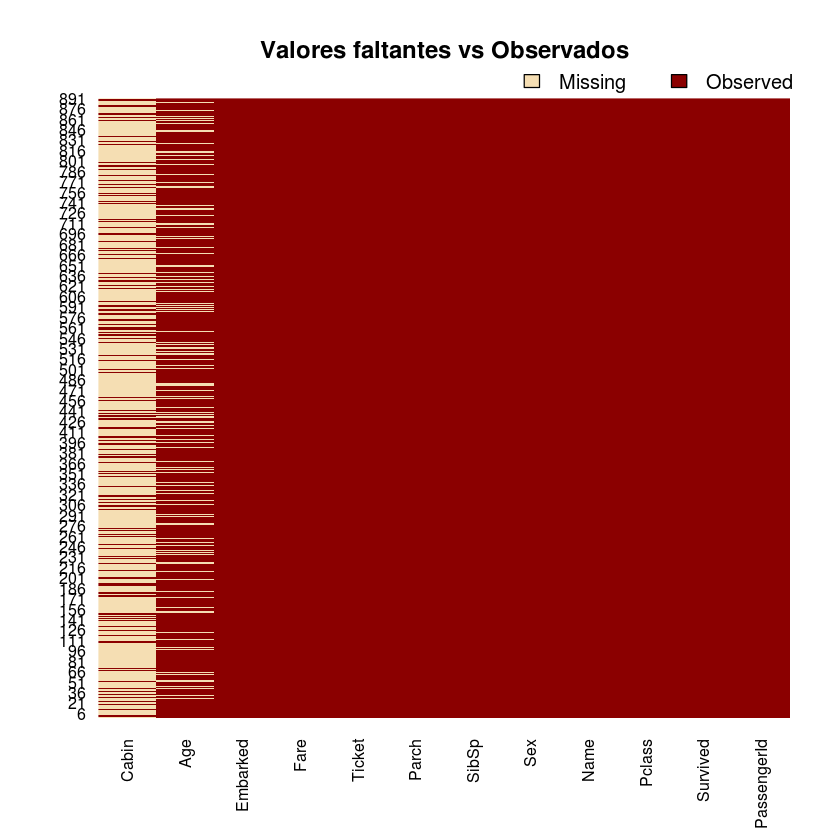

In [6]:
library(Amelia)
missmap(dado_cru_de_treinamento, main = "Valores faltantes vs Observados")

A coluna Cabin tem muitos valores faltantes, não vamos usá-lo. Também não usaremos a coluna PassengerId, uma vez que é apenas um índice e também a Ticket pode ficar de fora.

In [7]:
data <- subset(dado_cru_de_treinamento,select=c(2,3,5,6,7,8,10,12))

A coluna Age tbm tem vários dados faltantes, vamos substitui-los pela média das idades.

In [8]:
data$Age[is.na(data$Age)] <- mean(data$Age,na.rm=T)

No que diz respeito às variáveis categóricas, as funções read.table() ou read.csv(), por padrão, codificarão as variáveis categóricas como fatores. Um fator é como R relaciona variáveis categóricas.
Podemos verificar a codificação usando as seguintes linhas de código:

In [10]:
is.factor(data$Sex)
is.factor(data$Embarked)

[1] TRUE

[1] TRUE